# TYPOLOGIE DES REGARDS
## comparaison de populations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from math import pi
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import os
print(os.getcwd())

C:\myPython\typologie_regard


In [3]:
path_data = "Mesures_ETUDE2.csv"
my_data = pd.read_csv(path_data, header = 0, delimiter = ";", index_col = 0)
cols = my_data.columns
print(cols)

Index(['name', 'folder', 'ell_L', 'ell_R', 'in_angle_L', 'in_angle_R',
       'out_angle_L', 'out_angle_R', 'tilt_L', 'tilt_R', 'dist_L', 'dist_R',
       'sagging_L', 'sagging_R', 'golden_ratio_L', 'golden_ratio_R', 'area_L',
       'area_R', 'ratio_L', 'ratio_R', 'ratio1_L', 'ratio1_R', 'ratio2_L',
       'ratio2_R'],
      dtype='object')


In [4]:
stats_desc = my_data.describe()
print(stats_desc)

            ell_L       ell_R  in_angle_L  in_angle_R  out_angle_L  \
count  142.000000  142.000000  142.000000  142.000000   142.000000   
mean     0.331868    0.327450    0.828151    0.828424     1.062252   
std      0.041944    0.040649    0.090940    0.095802     0.148827   
min      0.208290    0.213551    0.582415    0.567097     0.624966   
25%      0.306699    0.304275    0.772065    0.766868     0.985858   
50%      0.334601    0.332088    0.830735    0.834237     1.072575   
75%      0.360832    0.354602    0.891669    0.894457     1.165277   
max      0.448815    0.437768    1.032756    1.085234     1.530175   

       out_angle_R      tilt_L      tilt_R      dist_L      dist_R  ...  \
count   142.000000  142.000000  142.000000  142.000000  142.000000  ...   
mean      1.042677    0.124733    0.124183  402.956483  411.102907  ...   
std       0.132599    0.024661    0.023906   72.957157   76.698721  ...   
min       0.622383    0.056591    0.062808  285.973775  269.295377  .

In [5]:
my_data["folder"].value_counts()

COREE    55
CHINE    44
JAPON    43
Name: folder, dtype: int64

In [6]:
my_data.groupby('folder').mean()
categories=list(my_data)[2:]
#["dist_mm","area_mm","golden_ratio","sagging","tilt","out_angle","in_angle","elongation"]
N_cat = len(categories)
print(categories)

['ell_L', 'ell_R', 'in_angle_L', 'in_angle_R', 'out_angle_L', 'out_angle_R', 'tilt_L', 'tilt_R', 'dist_L', 'dist_R', 'sagging_L', 'sagging_R', 'golden_ratio_L', 'golden_ratio_R', 'area_L', 'area_R', 'ratio_L', 'ratio_R', 'ratio1_L', 'ratio1_R', 'ratio2_L', 'ratio2_R']


In [7]:
select_data = my_data[cols[1:]]
print(select_data)

    folder     ell_L     ell_R  in_angle_L  in_angle_R  out_angle_L  \
id                                                                    
0    CHINE  0.359640  0.342950    0.853111    0.834952     1.180362   
1    CHINE  0.296328  0.322234    0.754780    0.757844     0.898731   
2    CHINE  0.315968  0.323552    0.764833    0.801315     1.007948   
3    CHINE  0.318245  0.324060    0.810641    0.831191     1.026152   
4    CHINE  0.334110  0.328573    0.840265    0.808591     1.029598   
..     ...       ...       ...         ...         ...          ...   
137  JAPON  0.263118  0.247874    0.688831    0.670028     0.853267   
138  JAPON  0.293708  0.308694    0.725825    0.811167     0.944459   
139  JAPON  0.375862  0.358175    0.909115    0.905089     1.273146   
140  JAPON  0.419354  0.422045    0.920508    1.031467     1.460893   
141  JAPON  0.333053  0.342713    0.811673    0.882211     1.101032   

     out_angle_R    tilt_L    tilt_R      dist_L  ...  golden_ratio_L  \
id 

ell_R
in_angle_L
in_angle_R
out_angle_L
out_angle_R
tilt_L
tilt_R
dist_L
dist_R
sagging_L
sagging_R
golden_ratio_L
golden_ratio_R
area_L
area_R
ratio_L
ratio_R
ratio1_L
ratio1_R
ratio2_L
ratio2_R


c:\mypython\image_env\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


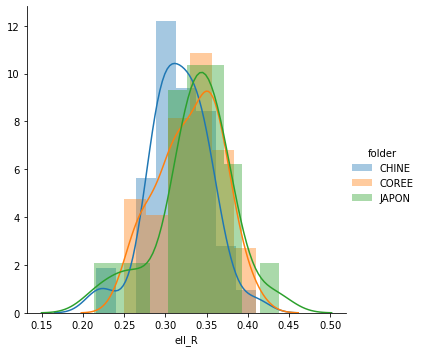

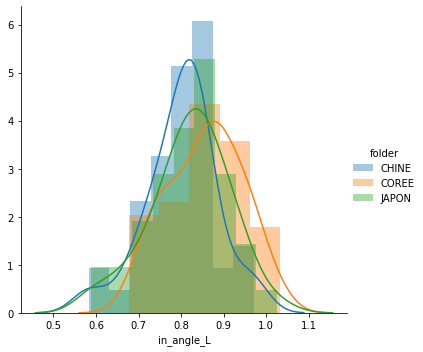

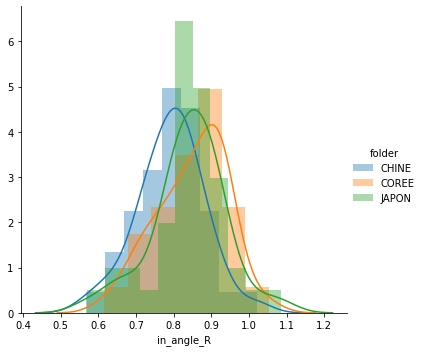

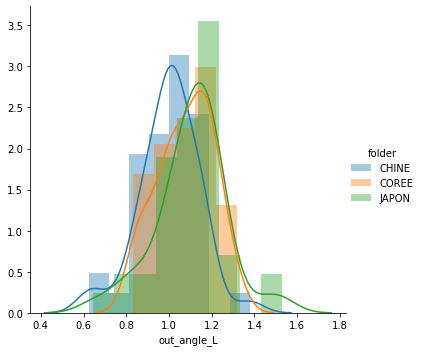

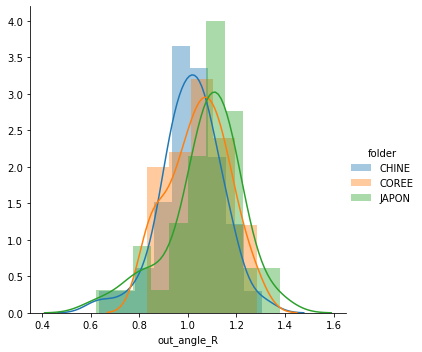

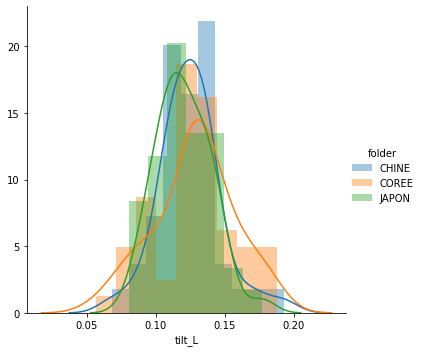

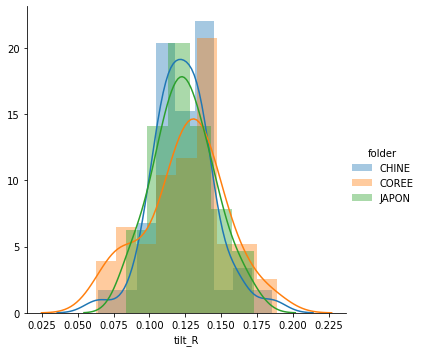

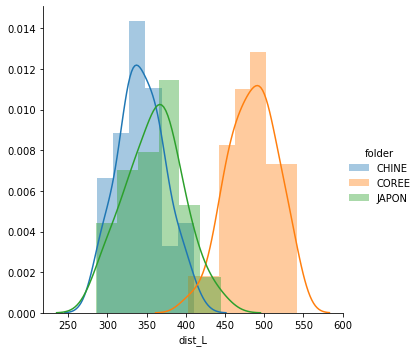

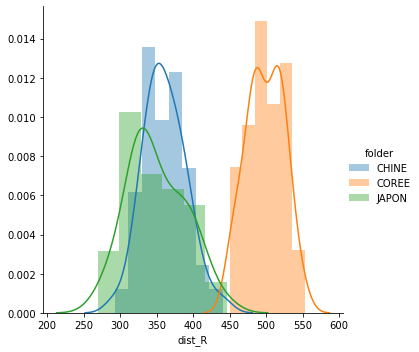

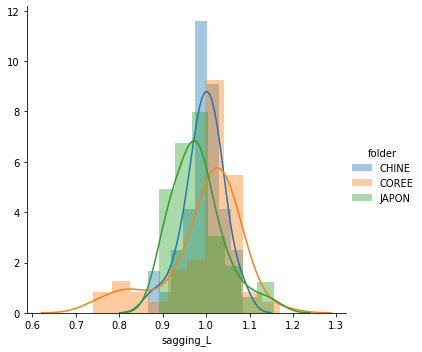

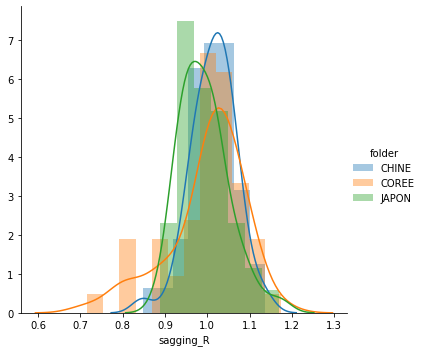

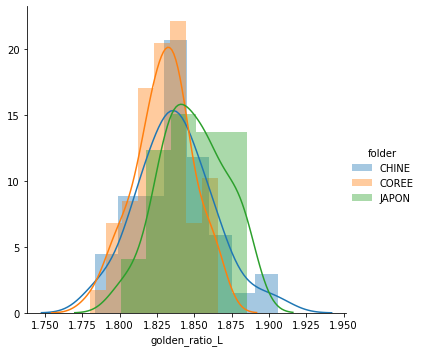

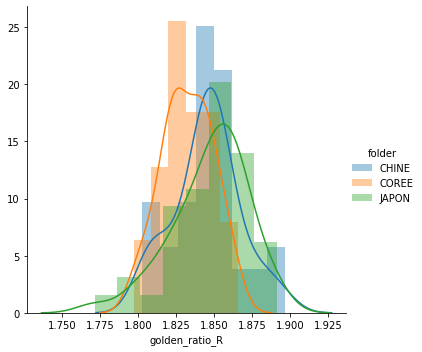

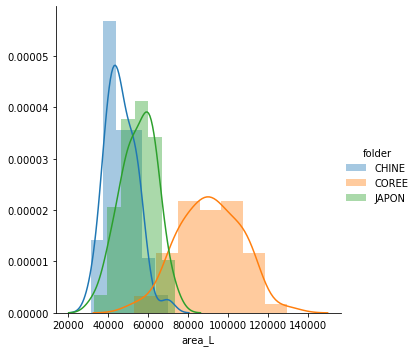

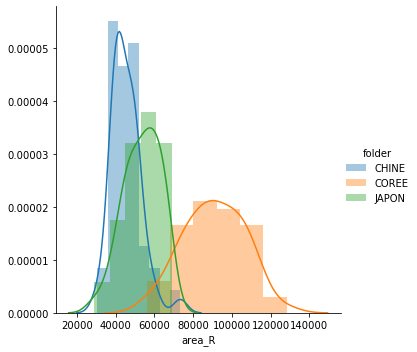

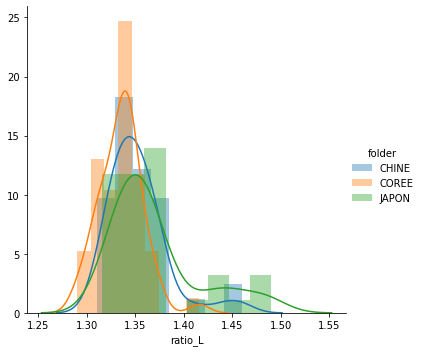

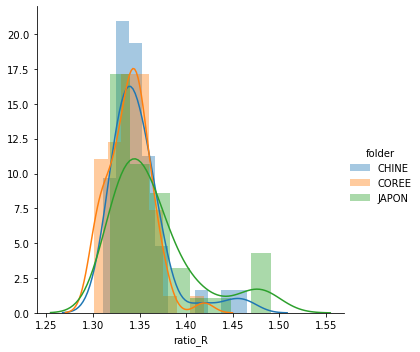

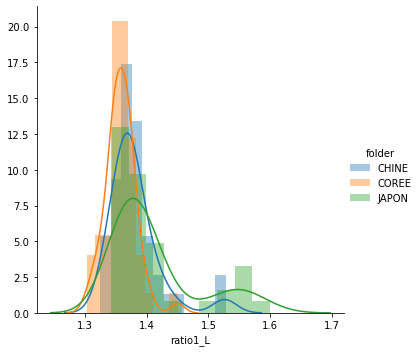

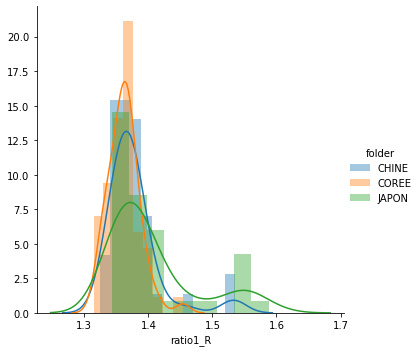

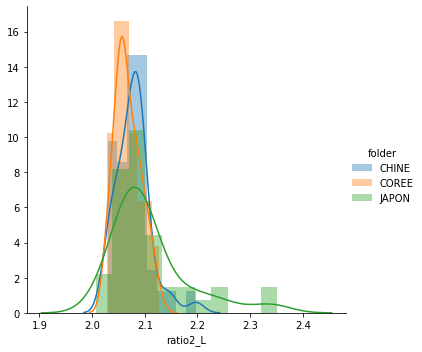

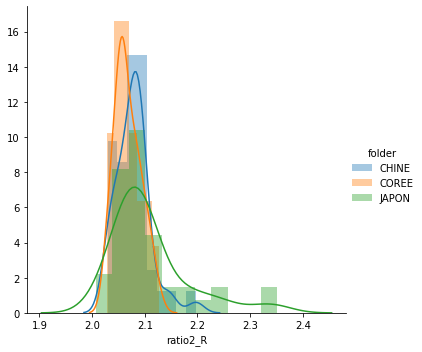

In [8]:
# Observation des ditributions des paramètres selon les pays
for col_name in cols[3:]:
    print(col_name)
    sns.FacetGrid(my_data,hue = "folder", height = 5).map(sns.distplot, col_name).add_legend()

c:\mypython\image_env\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


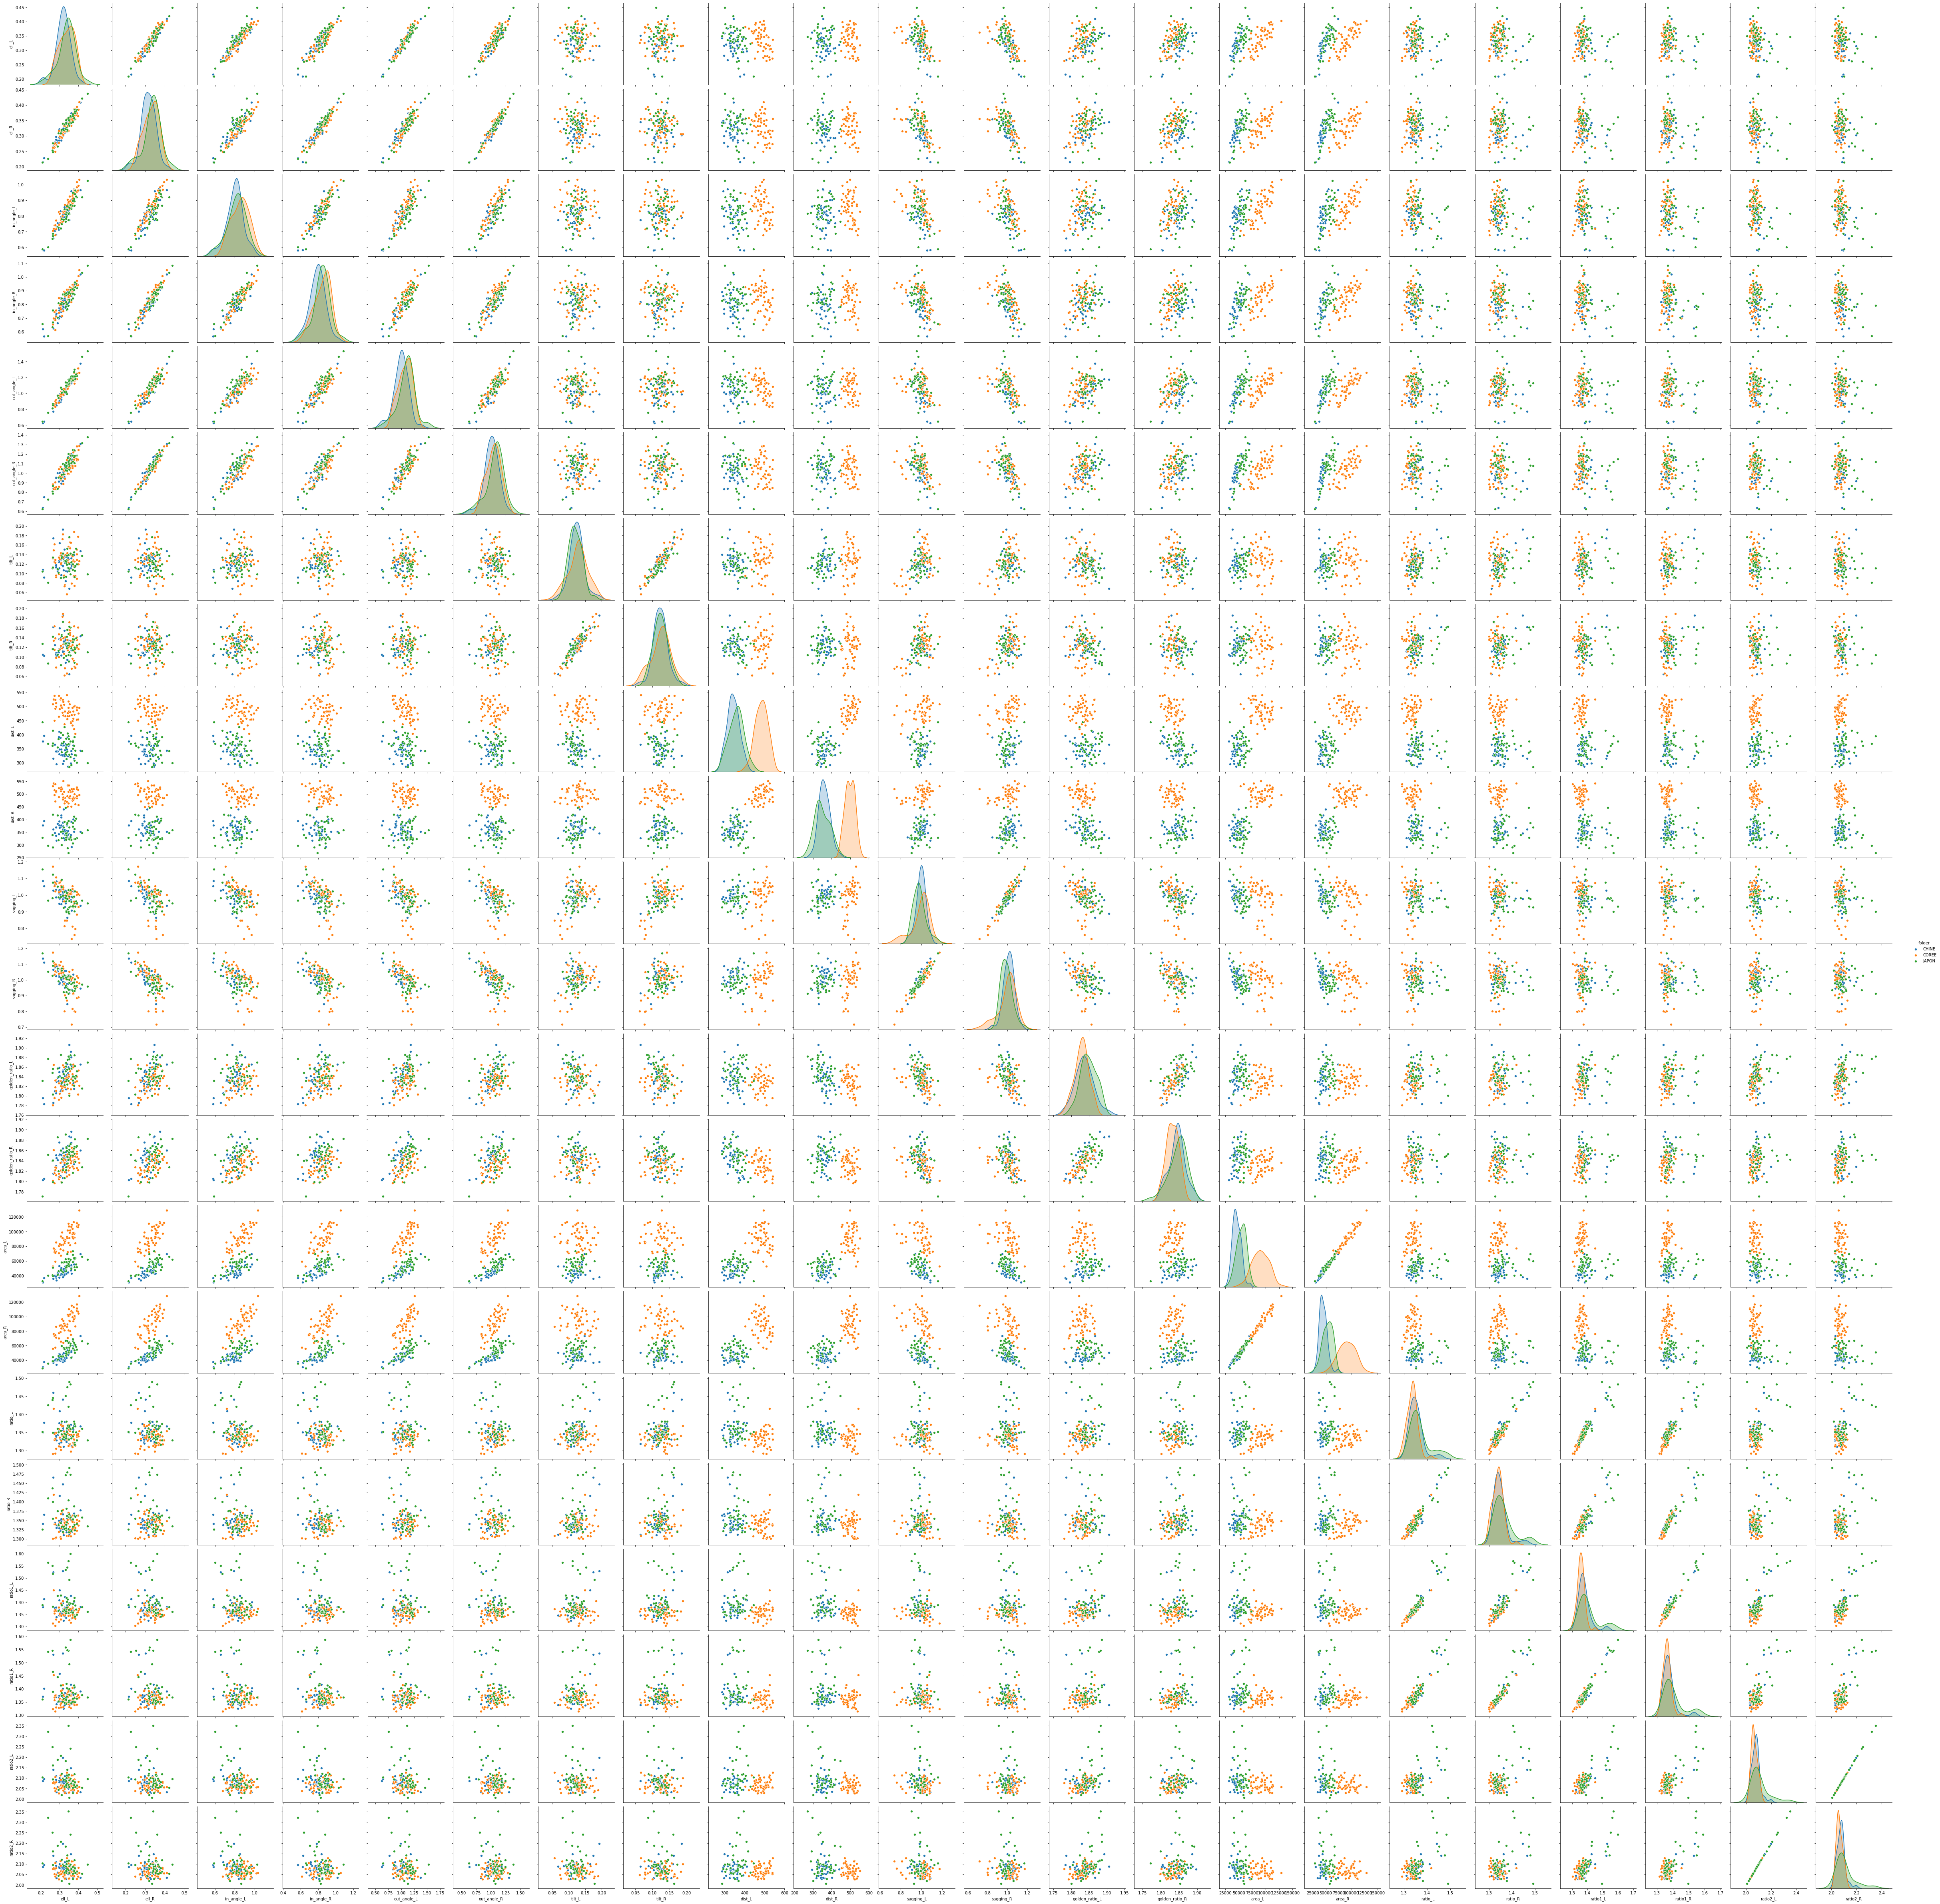

In [9]:
sns.pairplot(my_data, hue = "folder", size=3)
plt.show()

In [10]:
# normalisation des données (données centrées réduites)
sc = StandardScaler()
my_cols=["dist_mm","area_mm","golden_ratio","sagging","tilt","out_angle","in_angle","elongation"]
my_data_norm = sc.fit_transform(my_data[my_cols])

# nb observations
n = my_data_norm.shape[0]
# nb variables explicatives
p = my_data_norm.shape[1]

KeyError: "None of [Index(['dist_mm', 'area_mm', 'golden_ratio', 'sagging', 'tilt', 'out_angle',\n       'in_angle', 'elongation'],\n      dtype='object')] are in the [columns]"

In [ ]:
print(my_data_norm.shape)
new_cols=["dist_n","area_n","golden_ratio_n","sagging_n","tilt_n","out_angle_n","in_angle_n","elongation_n"]
for i in range(len(new_cols)):
    my_data[new_cols[i]] = my_data_norm[:,i]

my_data.describe()

In [ ]:
# on veut representer les populations par grandeur
radar_data = my_data.drop(my_cols, axis=1)
radar_data = radar_data.drop('name', axis=1)
mean_radar = radar_data.groupby('folder').mean()

mean_china = mean_radar.iloc[0]

In [ ]:

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N_cat) * 2 * pi for n in range(N_cat)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,0,1], ["-1","0","1"], color="grey", size=7)
plt.ylim(-1,1)
 

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values= mean_radar.iloc[0].values.flatten().tolist()
print(values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="chine")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=mean_radar.iloc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="france")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=mean_radar.iloc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="japon")
ax.fill(angles, values, 'g', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [ ]:
# vérifcation modification des données
np.mean(my_data_norm,axis=0)
np.std(my_data_norm,axis=0,ddof=0)

In [ ]:
from sklearn.decomposition import PCA
my_acp = PCA(svd_solver='full')
coord = my_acp.fit_transform(my_data_norm)
valeurs_propres =  (n-1)/n*my_acp.explained_variance_
ratio_vp = my_acp.explained_variance_ratio_
print(my_acp.n_components_)
print(my_acp.explained_variance_)
print(ratio_vp)

In [ ]:
# affichage des valeurs propres et explication de la variance
# eboulis valeurs propres
plt.plot(np.arange(1,p+1),valeurs_propres)
plt.title("Eboulie vp")
plt.ylabel("Valeurs propres")
plt.xlabel("Variables #")
plt.show()

In [ ]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(my_acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [ ]:
print(coord.shape)

In [ ]:
sns.scatterplot(coord[:,0],coord[:,1],hue=my_data['folder'])

In [ ]:
sns.scatterplot(coord[:,0],coord[:,2],hue=my_data['folder'])

In [ ]:
sns.scatterplot(coord[:,1],coord[:,2],hue=my_data['folder'])

In [ ]:
# contribution des individus dans l'intertie totale
di = np.sum(coord**2, axis=1)
print(pd.DataFrame({'name':my_data['name'], 'd_i':di}))

In [ ]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,0]/di
    
cos2_data = pd.DataFrame({'name':my_data['name'],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
print(cos2_data)

In [ ]:
cos2_data.sort_values(by=['COS2_1','COS2_2'], ascending=False)

In [ ]:
sqrt_vp = np.sqrt(valeurs_propres)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = my_acp.components_[k,:] * sqrt_vp[k]

print(corvar)

In [ ]:
data_corvar = pd.DataFrame({'id':my_cols,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
print(data_corvar)

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(my_cols[j], (corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0], color ='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1], color ='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(my_cols[j], (corvar[j,0],corvar[j,2]))

plt.plot([-1,1],[0,0], color ='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1], color ='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(my_cols[j], (corvar[j,2],corvar[j,1]))

plt.plot([-1,1],[0,0], color ='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1], color ='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# Demo 1: zdir
#zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = corvar[:,0]
ys = corvar[:,1]
zs = corvar[:,2]
labels = my_cols

for x, y, z, label in zip(xs, ys, zs, labels):
    ax.text(x, y, z, label, None)
    
# Tweaking display region and labels
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Demo 1: zdir
#zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = coord[:,0]
ys = coord[:,1]
zs = coord[:,2]
labels = my_data['folder']

for x, y, z, label in zip(xs, ys, zs, labels):
    ax.scatter(x, y, z,c='skyblue')
    #ax.text(x, y, z, label, None)
    
# Tweaking display region and labels
ax.set_xlim(-6, 6)
ax.set_ylim(-4, 4)
ax.set_zlim(-3, 3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [ ]:
# cos2 des variables
cos2var = corvar**2
cos2var_data =pd.DataFrame({'id':my_cols,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,3]})
print(cos2var_data)

# Analyse par regression logistique multinomiale

In [ ]:
X = my_data_norm
X2 = coord
Ychine = (my_data['folder']=='Chine')*1
Yfrance = (my_data['folder']=='France')*1
Yjapon = (my_data['folder']=='Japon')*1
print(X)

In [ ]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[Ychine == 0][:, 0], X[Ychine == 0][:, 1], color='g', label='non-chine')
plt.scatter(X[Ychine == 1][:, 0], X[Ychine == 1][:, 1], color='y', label='chine')
plt.legend();

In [ ]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[Yfrance == 0][:, 0], X[Yfrance == 0][:, 1], color='g', label='non-france')
plt.scatter(X[Yfrance == 1][:, 0], X[Yfrance == 1][:, 1], color='y', label='france')
plt.legend();

In [ ]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[Yjapon == 0][:, 0], X[Yjapon == 0][:, 1], color='g', label='non-japon')
plt.scatter(X[Yjapon == 1][:, 0], X[Yjapon == 1][:, 1], color='y', label='japon')
plt.legend();

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20)
model_chine = model.fit(X,Ychine)
model_france = model.fit(X,Yfrance)
model_japon = model.fit(X,Yjapon)

In [ ]:
print(model_chine)